Toda nossa lista 5 abordará uma temática única de acordo com a base de dados escolhida para a realização da mesma.

**PAÍSES MENOS CORRUPTOS SÃO MAIS FELIZES?**

Será que a felicidade e a corrupção têm alguma relação? A resposta a essa pergunta não é tão clara quanto gostaríamos que fosse. A felicidade é o que todos desejam, enquanto a corrupção é frequentemente vista como algo que a sociedade deve combater. No entanto, a conexão direta entre esses dois conceitos é desafiadora de estabelecer.

A corrupção é prejudicial, pois mina a confiança nas instituições públicas e distorce a alocação de recursos. Isso certamente não soa como um ingrediente para a felicidade. No entanto, em muitos lugares, a corrupção é endêmica, mas as pessoas ainda relatam altos níveis de felicidade. Isso nos faz questionar se a percepção de felicidade pode ser independente da corrupção.

Talvez as pessoas se adaptem à corrupção, ou talvez outros fatores, como economia e segurança, desempenhem um papel mais significativo em sua felicidade. Em última análise, a relação entre felicidade e corrupção é complexa, e as respostas podem variar dependendo do contexto.

Portanto, a questão persiste: **será que a corrupção realmente impede a felicidade? Ou será que a felicidade pode ser encontrada em meio à corrupção?**

vamos utilizar da base de dados Happiness and Corruption 2015-2020

https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

para chegar em alguma conclusão sobre o tema

## QUESTÃO 0

Carregue os dados do arquivo "happiness_corruption.csv" em um DataFrame e mostre as primeiras 5 linhas do DataFrame 

In [125]:
import pandas as pd
df = pd.read_csv("WorldHappiness_Corruption_2015_2020.csv")
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


## QUESTÃO 1


**Exploração Inicial dos Dados**

a) Verifique o número de linhas e colunas no DataFrame. **lembre-se do método .shape**


In [24]:
df.shape

(792, 13)

b) Liste as colunas presentes no DataFrame. **lembre-se do método .columns**


In [25]:
for i in df.columns:
    print(i)

Country
happiness_score
gdp_per_capita
family
health
freedom
generosity
government_trust
dystopia_residual
continent
Year
social_support
cpi_score


c) Verifique se há valores nulos em cada coluna.

In [26]:
print(df.isnull().any().any())

False


Não há nenhum valor nulo no dataframe

## QUESTÃO 2

a) Remova as colunas não relevantes que não serão usadas na análise, como "generosity" (generosidade), "family"(familia),
"health"( saúde), "freedom" (liberdade), "dystopia_residual"(distopia residual), "social_support" (suporte social) e "cpi_score"

In [126]:
df = df.drop(['generosity', 'family', 'health', 'freedom', 'dystopia_residual', 'social_support', 'cpi_score' ], axis=1)
df.head(6)

,Country,happiness_score,gdp_per_capita,government_trust,continent,Year
0,Norway,7.537,1.616463,0.315964,Europe,2015
1,Denmark,7.522,1.482383,0.400770,Europe,2015
2,Iceland,7.504,1.480633,0.153527,Europe,2015
3,Switzerland,7.494,1.564980,0.367007,Europe,2015
4,Finland,7.469,1.443572,0.382612,Europe,2015
5,Netherlands,7.377,1.503945,0.282662,Europe,2015


In [6]:
df.shape

(792, 6)

b) 
Renomeie as colunas para torná-las mais descritivas. Por exemplo, renomeie "Score" para "Pontuacao_Felicidade", "Country" para "Países", "GDP per capita" para "PIB_Per_Capita", "continent" para "Continentes", "Year" para "ano" e government_trust para "confian_gov".

In [127]:
df.rename(columns={'Country':'Países', 'happiness_score': "Felicidade", 'gdp_per_capita': "PIB_Per_Capita",
                   'government_trust': 'confian_gov', 'continent' : 'Continentes', 'Year': "Ano"}, inplace=True)
df.head()

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,Ano
0,Norway,7.537,1.616463,0.315964,Europe,2015
1,Denmark,7.522,1.482383,0.400770,Europe,2015
2,Iceland,7.504,1.480633,0.153527,Europe,2015
3,Switzerland,7.494,1.564980,0.367007,Europe,2015
4,Finland,7.469,1.443572,0.382612,Europe,2015


## QUESTÃO 3



**Estatísticas Descritivas**

Calcule estatísticas descritivas para as colunas relevantes: "Score" (pontuação de felicidade), "GDP per capita" (PIB per capita) e "Corruption Perception" (percepção de corrupção) e . Mostre a média, mediana, desvio padrão, mínimo e máximo para cada uma dessas colunas.

In [69]:
x = df.describe()
x.drop(['Ano'], axis=1, inplace=True)
x.head(8)

,Felicidade,PIB_Per_Capita,confian_gov
count,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.125720
std,1.124726,0.385774,0.109032
min,2.566900,0.000000,0.000000
25%,4.590750,0.644242,0.052862
50%,5.485500,0.994544,0.089000
75%,6.300500,1.228677,0.154250
max,7.808700,2.096000,0.551910


In [70]:
x.drop(['count', '25%', '75%'], axis=0, inplace=True)
x.rename(index={'50%':'Mediana'}, inplace = True) 
x.head(5)

,Felicidade,PIB_Per_Capita,confian_gov
mean,5.473310,0.929217,0.125720
std,1.124726,0.385774,0.109032
min,2.566900,0.000000,0.000000
Mediana,5.485500,0.994544,0.089000
max,7.808700,2.096000,0.551910


## QUESTÃO 4

Vamos usar somente o ano de 2019 para facilitar a análise.

a) Incluir no dataframe apenas as linhas do ano de 2019

In [71]:
mask = df['Ano'] == 2019
df2019 = df[mask]
df2019.head(10)

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,Ano
528,Denmark,7.526,1.44178,0.44453,Europe,2019
529,Switzerland,7.509,1.52733,0.41203,Europe,2019
530,Iceland,7.501,1.42666,0.14975,Europe,2019
531,Norway,7.498,1.57744,0.35776,Europe,2019
532,Finland,7.413,1.40598,0.41004,Europe,2019
533,Canada,7.404,1.44015,0.31329,North America,2019
534,Netherlands,7.339,1.46468,0.29927,Europe,2019
535,New Zealand,7.334,1.36066,0.41904,Australia,2019
536,Australia,7.313,1.44443,0.32331,Australia,2019
537,Sweden,7.291,1.45181,0.40867,Europe,2019


In [72]:
print(df2019['Felicidade'].mean())

5.430704545454546


b) Criar um novo DataFrame com países que têm pontuação de felicidade acima da média global ( do exercicio anterior)

In [73]:
mask2 = df2019['Felicidade'] > df2019['Felicidade'].mean()
df2 = df2019[mask2]
df2.head(10)

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,Ano
528,Denmark,7.526,1.44178,0.44453,Europe,2019
529,Switzerland,7.509,1.52733,0.41203,Europe,2019
530,Iceland,7.501,1.42666,0.14975,Europe,2019
531,Norway,7.498,1.57744,0.35776,Europe,2019
532,Finland,7.413,1.40598,0.41004,Europe,2019
533,Canada,7.404,1.44015,0.31329,North America,2019
534,Netherlands,7.339,1.46468,0.29927,Europe,2019
535,New Zealand,7.334,1.36066,0.41904,Australia,2019
536,Australia,7.313,1.44443,0.32331,Australia,2019
537,Sweden,7.291,1.45181,0.40867,Europe,2019


In [74]:
df2['Felicidade'].mean()

6.411107692307693

A media subiu mesmo, fiz isso pra testar se tinha realmente removido os valores abaixo da media

# QUESTÃO 5

**Classificação**

Classifique o DataFrame resultante do Exercício 4 pela coluna "Score" em ordem decrescente. Mostre os 10 países com as maiores pontuações de felicidade. Isso é útil para responder a perguntas como:

Quais países têm os maiores níveis de felicidade? A classificação em ordem decrescente fornece uma lista dos países com as maiores pontuações de felicidade, destacando aqueles que estão no topo da lista.

Houve alguma mudança significativa na classificação da felicidade ao longo do tempo? Comparando a classificação em diferentes anos, é possível identificar se houve mudanças significativas na pontuação de felicidade de países específicos.

Quais países são modelos de sucesso em termos de felicidade? A classificação ajuda a identificar países que são frequentemente citados como exemplos de sucesso em termos de bem-estar e qualidade de vida.

In [95]:
df_sorted2019 = df2019.sort_values(by='Felicidade', ascending=False)
df_sorted2019.drop(['PIB_Per_Capita', 'confian_gov', 'Continentes', 'Ano'], axis=1, inplace=True)
df_sorted2019.rename(columns={'Felicidade':'2019'}, inplace=True)

In [96]:
mask = df['Ano'] == 2016
df2016 = df[mask]
df_sorted2016 = df2016.sort_values(by='Felicidade', ascending=False)
df_sorted2016.drop(['PIB_Per_Capita', 'confian_gov', 'Continentes', 'Ano'], axis=1, inplace=True)
df_sorted2016.rename(columns={'Felicidade':'2016'}, inplace=True)

In [97]:
mask = df['Ano'] == 2017
df2017 = df[mask]
df_sorted2017 = df2017.sort_values(by='Felicidade', ascending=False)
df_sorted2017.drop(['PIB_Per_Capita', 'confian_gov', 'Continentes', 'Ano'], axis=1, inplace=True)
df_sorted2017.rename(columns={'Felicidade':'2017'}, inplace=True)

mask = df['Ano'] == 2018
df2018 = df[mask]
df_sorted2018 = df2018.sort_values(by='Felicidade', ascending=False)
df_sorted2018.drop(['PIB_Per_Capita', 'confian_gov', 'Continentes', 'Ano'], axis=1, inplace=True)
df_sorted2018.rename(columns={'Felicidade':'2018'}, inplace=True)

mask = df['Ano'] == 2020
df2020 = df[mask]
df_sorted2020 = df2020.sort_values(by='Felicidade', ascending=False)
df_sorted2020.drop(['PIB_Per_Capita', 'confian_gov', 'Continentes', 'Ano'], axis=1, inplace=True)
df_sorted2020.rename(columns={'Felicidade':'2020'}, inplace=True)

mask = df['Ano'] == 2015
df2015 = df[mask]
df_sorted2015 = df2015.sort_values(by='Felicidade', ascending=False)
df_sorted2015.drop(['PIB_Per_Capita', 'confian_gov', 'Continentes', 'Ano'], axis=1, inplace=True)
df_sorted2015.rename(columns={'Felicidade':'2015'}, inplace=True)

In [101]:
df_graph = pd.merge(df_sorted2015, df_sorted2016,  on='Países', how='outer')
df_graph = pd.merge(df_graph, df_sorted2017,  on='Países', how='outer')
df_graph = pd.merge(df_graph, df_sorted2018,  on='Países', how='outer')
df_graph = pd.merge(df_graph, df_sorted2019,  on='Países', how='outer')
df_graph = pd.merge(df_graph, df_sorted2020,  on='Países', how='outer')
df_graph = df_graph.sort_values(by='2020', ascending=False)
df_graph = df_graph.iloc[:10]
df_graph

,Países,2015,2016,2017,2018,2019,2020
4,Finland,7.469,7.406,7.769,7.632,7.413,7.8087
1,Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
3,Switzerland,7.494,7.587,7.480,7.487,7.509,7.5599
2,Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
0,Norway,7.537,7.522,7.554,7.594,7.498,7.4880
5,Netherlands,7.377,7.378,7.488,7.441,7.339,7.4489
8,Sweden,7.284,7.364,7.343,7.314,7.291,7.3535
7,New Zealand,7.314,7.286,7.307,7.324,7.334,7.2996
12,Austria,7.006,7.200,7.246,7.139,7.119,7.2942
17,Luxembourg,6.863,6.946,7.090,6.910,6.871,7.2375


Score de felicidade dos top 10 países ao longo dos anos

In [104]:
import matplotlib.pyplot as plt

## QUESTÃO 6

**Agrupando Dados por Região**

Agrupe os dados por região (coluna "Region") e calcule a média das pontuações de felicidade para cada região. Ordene as regiões pela média de pontuação de felicidade em ordem decrescente.

In [77]:
#nao tem nenhuma coluna region, vcs podiam prestar mais atenção na hora de fazer essas listas hein, toda vez tem um monte 
#de erro
df['Continentes'].unique()

array(['Europe', 'North America', 'Australia', 'Asia', 'South America',
       'Africa'], dtype=object)

In [78]:
por_continente = df.groupby("Continentes")["Felicidade"].mean().sort_values(ascending=False)
display(por_continente)

Continentes
Australia        7.289033
North America    7.000539
Europe           6.193717
South America    5.865516
Asia             5.267553
Africa           4.353944
Name: Felicidade, dtype: float64

In [79]:
df['Ano'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

## QUESTÃO 7

**Lidando com Dados Ausentes**

Verifique se há dados ausentes no DataFrame e, se houver, retire a linha inteira em questão. Certifique-se de que o DataFrame não possui mais dados ausentes após o preenchimento.

In [105]:
print(df.isna().any().any())

False


# Questão 8

Agora você tem uma base de dados limpa e com informações relevantes para responder algumas questões.

- Países mais ricos são mais felizes? 
- Países com maior confiança no governo (menos experiencias com corrupção) são mais felizes?
- Aonde se localizam os países mais felizes? Europa? Ásia?....


**Países com maior confiança no governo são mais felizes?**

a) Calcule a média da coluna "Confianca_Gov" para obter um valor médio que será usado como ponto de corte.

In [107]:
df2019['confian_gov'].mean()

0.1345437121212121

b) Com base na média calculada, crie uma nova coluna no DataFrame que atribuirá um rótulo ("alta" ou "baixa") a cada país de acordo com sua confiança no governo em relação à média.

In [111]:
def rotulo_confianca (conf):
    if conf > 0.1345:
        return "Alta"
    else:
        return "Baixa"

df2019['Rotulo_Confianca'] = df2019['confian_gov'].apply(rotulo_confianca) 
df2019

C:\Users\HP\AppData\Local\Temp\ipykernel_10024\850181875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['Rotulo_Confianca'] = df2019['confian_gov'].apply(rotulo_confianca)


,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,Ano,Rotulo_Confianca
528,Denmark,7.526,1.44178,0.44453,Europe,2019,Alta
529,Switzerland,7.509,1.52733,0.41203,Europe,2019,Alta
530,Iceland,7.501,1.42666,0.14975,Europe,2019,Alta
531,Norway,7.498,1.57744,0.35776,Europe,2019,Alta
532,Finland,7.413,1.40598,0.41004,Europe,2019,Alta
...,...,...,...,...,...,...,...
655,Rwanda,3.515,0.32846,0.50521,Africa,2019,Alta
656,Benin,3.484,0.39499,0.06681,Africa,2019,Baixa
657,Afghanistan,3.360,0.38227,0.07112,Asia,2019,Baixa
658,Togo,3.303,0.28123,0.11587,Africa,2019,Baixa


c) Após dividir os países em grupos, calcule a média da pontuação de felicidade para cada grupo separadamente.


In [114]:
x = df2019.groupby("Rotulo_Confianca")["Felicidade"].mean()
display(x)

Rotulo_Confianca
Alta     6.131830
Baixa    5.043024
Name: Felicidade, dtype: float64

d) Use um gráfico de barras para representar a relação entre o nível de confiança no governo e a média da pontuação de felicidade. Cada barra no gráfico representa um grupo (alta ou baixa) e a altura da barra representa a média da pontuação de felicidade para esse grupo.

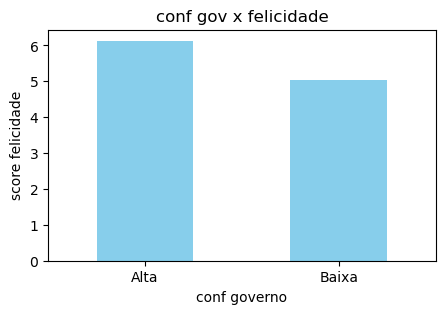

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
x.plot(kind='bar', color='skyblue') ## bar = grafico em barras  ## skyblue é a cor do grafico
plt.title('conf gov x felicidade')  ## dê um titulo 
plt.xlabel('conf governo')  ## o que você quer no eixo x
plt.ylabel('score felicidade')    ## o que você quer no eixo y
plt.xticks(rotation=0)
plt.show()

e) qual é a conclusão de **Países com maior confiança no governo são mais felizes?**

RESPOSTA...............SIM

## QUESTÃO 9

**Países mais ricos são mais felizes?**

a) Crie um gráfico de dispersão (scatter plot) que mostre a relação entre a pontuação de felicidade e o PIB per capita. Coloque a pontuação de felicidade no eixo vertical (y) e o PIB per capita no eixo horizontal (x). Adicione rótulos aos eixos e um título informativo ao gráfico.

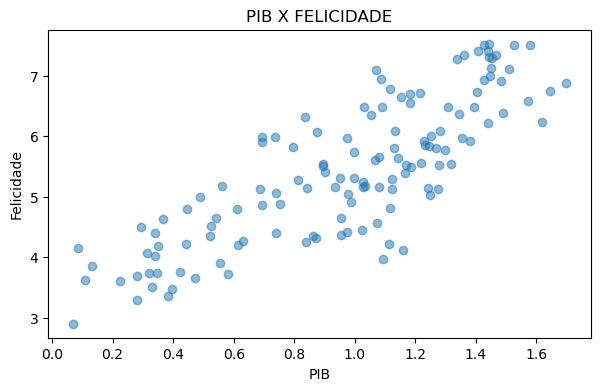

In [123]:

# Defina os dados para os eixos x e y
x = df2019['PIB_Per_Capita']
y = df2019['Felicidade']

# Crie o gráfico de dispersão
plt.figure(figsize=(7, 4))  # Define o tamanho da figura
plt.scatter(x, y, alpha=0.5)  # Cria o scatter plot com transparência

# Adicione rótulos aos eixos
plt.xlabel('PIB')
plt.ylabel('Felicidade')
plt.title('PIB X FELICIDADE')

# Exiba o gráfico
plt.show()

b) Qual é a conclusão de **Países mais ricos são mais felizes?**

RESPOSTA  ............ha uma correlação positiva entre felicidade e pib per capita

## QUESTÃO 10

**Aonde se localizam os países mais felizes? Europa? Ásia?....**

a) Calcule a média da pontuação de felicidade (Score) em todo o DataFrame.


In [128]:
df['Felicidade'].mean()

5.47330984670202

b) Crie dois DataFrames separados: um com os países com pontuação de felicidade acima da média e outro com os países com pontuação abaixo da média.

In [129]:
acima = df['Felicidade'] >= df['Felicidade'].mean()
dfacima = df[acima]

In [130]:
abaixo = df['Felicidade'] < df['Felicidade'].mean()
dfabaixo = df[abaixo]

c) Para cada um dos dois DataFrames criados no item b, crie subgrupos calculando a contagem de países por continente (coluna "Region"). dica: .value_counts()

In [135]:
dfacima['Continentes'].value_counts()

Europe           176
South America     95
Asia              83
North America     18
Africa            15
Australia         12
Name: Continentes, dtype: int64

In [136]:
dfabaixo['Continentes'].value_counts()

Africa           177
Asia             139
Europe            52
South America     25
Name: Continentes, dtype: int64

d) Calcule a porcentagem que cada continente representa em relação ao total de países em cada grupo.

In [138]:
dfacima.shape

(399, 6)

In [139]:
dfabaixo.shape

(393, 6)

In [160]:
c = dfabaixo['Continentes'].value_counts()
baba = c.apply(lambda x: x/393 * 100)
baba

Africa           45.038168
Asia             35.368957
Europe           13.231552
South America     6.361323
Name: Continentes, dtype: float64

In [161]:
c = dfacima['Continentes'].value_counts()
s = c.apply(lambda x: x/399 * 100)
s

Europe           44.110276
South America    23.809524
Asia             20.802005
North America     4.511278
Africa            3.759398
Australia         3.007519
Name: Continentes, dtype: float64

e) Crie gráficos de barras que mostrem a porcentagem de cada continente nos grupos de alta felicidade e baixa felicidade.

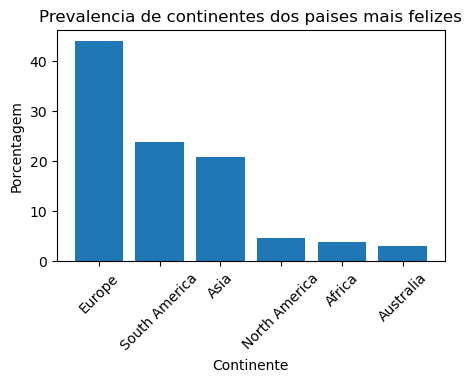

In [164]:

plt.figure(figsize=(5, 3))
plt.bar(s.index, s)
plt.title('Prevalencia de continentes dos paises mais felizes')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.show()

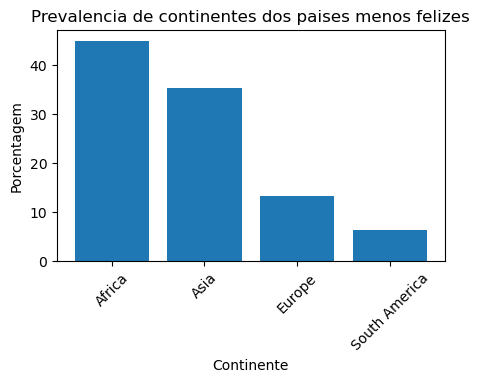

In [166]:
plt.figure(figsize=(5, 3))
plt.bar(baba.index, baba)
plt.title('Prevalencia de continentes dos paises menos felizes')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

f)  Qual é a conclusão da questão: **Aonde se localizam os países mais felizes? Europa? Ásia?....**

RESPOSTA ...........EUROPA

APÓS A LISTA VOCÊ CONSEGUE ENXERGAR ALGUMA CONCLUSÃO SOBRE A QUESTÃO INICIAL DO TEMA? SIM